In [139]:
import pandas as pd
import numpy as np
import pymongo
from pymongo import MongoClient
import prediction
from pipeline_classes import Featurizer
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import mpld3
from datetime import datetime as dt

In [3]:
client = MongoClient('localhost', 27017)
db = client.Snoqualmie
pass_closure = db.docs

In [9]:
def get_pred():
    """Get the predictions and data to display"""
    #pass_closure = mongo.db.docs
    output = []
    data = pass_closure.find()
    for row in data:
        pred = round(prediction.get_one_prediction(row), 2)
        output.append({'date' : row['date'],  'probability': pred})
    return output

In [15]:
output = pass_closure.find()
for doc in output:
    print(doc)

{'_id': ObjectId('5c086b116711dbee64b4b99c'), 'date': datetime.datetime(2018, 12, 5, 0, 0), 'temp': 15.0, 'precipitation': 0, 'windy': 1, 'overcast': 0, 'poor_visibility': 0}
{'_id': ObjectId('5c086b116711dbee64b4b99d'), 'date': datetime.datetime(2018, 12, 6, 0, 0), 'temp': 20.0, 'precipitation': 0, 'windy': 1, 'overcast': 0, 'poor_visibility': 0}
{'_id': ObjectId('5c086b116711dbee64b4b99e'), 'date': datetime.datetime(2018, 12, 7, 0, 0), 'temp': 23.0, 'precipitation': 0, 'windy': 0, 'overcast': 0, 'poor_visibility': 0}
{'_id': ObjectId('5c086b116711dbee64b4b99f'), 'date': datetime.datetime(2018, 12, 8, 0, 0), 'temp': 25.0, 'precipitation': 0, 'windy': 0, 'overcast': 0, 'poor_visibility': 0}
{'_id': ObjectId('5c086b116711dbee64b4b9a0'), 'date': datetime.datetime(2018, 12, 9, 0, 0), 'temp': 26.0, 'precipitation': 1, 'windy': 0, 'overcast': 1, 'poor_visibility': 1}
{'_id': ObjectId('5c086b116711dbee64b4b9a1'), 'date': datetime.datetime(2018, 12, 10, 0, 0), 'temp': 28.0, 'precipitation': 1

In [37]:
output = pass_closure.find()
result = []
for row in output:
    df = pd.DataFrame([row])
    df.drop(['_id'], axis=1, inplace=True)
    df.index = df.date
    date_column = pd.Series(df.index)
    month_day_of_week = pd.DataFrame({"year": date_column.dt.year,
                                    "month": date_column.dt.month, 
                                    "day": date_column.dt.day,
                                    "dayofweek": date_column.dt.dayofweek})
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 0] = 'Monday'
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 1] = 'Tuesday'
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 2] = 'Wednesday'
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 3] = 'Thursday'
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 4] = 'Friday'
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 5] = 'Saturday'
    month_day_of_week.dayofweek[month_day_of_week.dayofweek == 6] = 'Sunday'
    month_day_of_week = pd.get_dummies(month_day_of_week)
    print(df)
    print(date_column)
    print(month_day_of_week)

                 date  overcast  poor_visibility  precipitation  temp  windy
date                                                                        
2018-12-05 2018-12-05         0                0              0  15.0      1
0   2018-12-05
Name: date, dtype: datetime64[ns]
   year  month  day  dayofweek_Wednesday
0  2018     12    5                    1
                 date  overcast  poor_visibility  precipitation  temp  windy
date                                                                        
2018-12-06 2018-12-06         0                0              0  20.0      1
0   2018-12-06
Name: date, dtype: datetime64[ns]
   year  month  day  dayofweek_Thursday
0  2018     12    6                   1
                 date  overcast  poor_visibility  precipitation  temp  windy
date                                                                        
2018-12-07 2018-12-07         0                0              0  23.0      0
0   2018-12-07
Name: date, dtype: datetime64[ns

In [23]:
output

In [77]:
def get_pred():
    """Get the predictions and data to display"""
    #pass_closure = mongo.db.docs
    output = []
    data = pass_closure.find()
    df = pd.DataFrame(list(data))
    df.drop(['_id'], axis=1, inplace=True)
    predictions = prediction.get_predictions(df)
    df['predictions'] = predictions[:,1]
    df = df.round(2)
    return df.loc[:, ['date', 'predictions']] 

In [146]:
output = get_pred()

In [147]:
output

,date,predictions
0,2018-12-10,0.26
1,2018-12-11,0.14
2,2018-12-12,0.08
3,2018-12-13,0.17
4,2018-12-14,0.13
5,2018-12-15,0.14
6,2018-12-16,0.24
7,2018-12-17,0.22
8,2018-12-18,0.30
9,2018-12-19,0.14


In [148]:
output['date'] = output.date.dt.strftime("%a %b %d")

In [149]:
output

,date,predictions
0,Mon Dec 10,0.26
1,Tue Dec 11,0.14
2,Wed Dec 12,0.08
3,Thu Dec 13,0.17
4,Fri Dec 14,0.13
5,Sat Dec 15,0.14
6,Sun Dec 16,0.24
7,Mon Dec 17,0.22
8,Tue Dec 18,0.30
9,Wed Dec 19,0.14


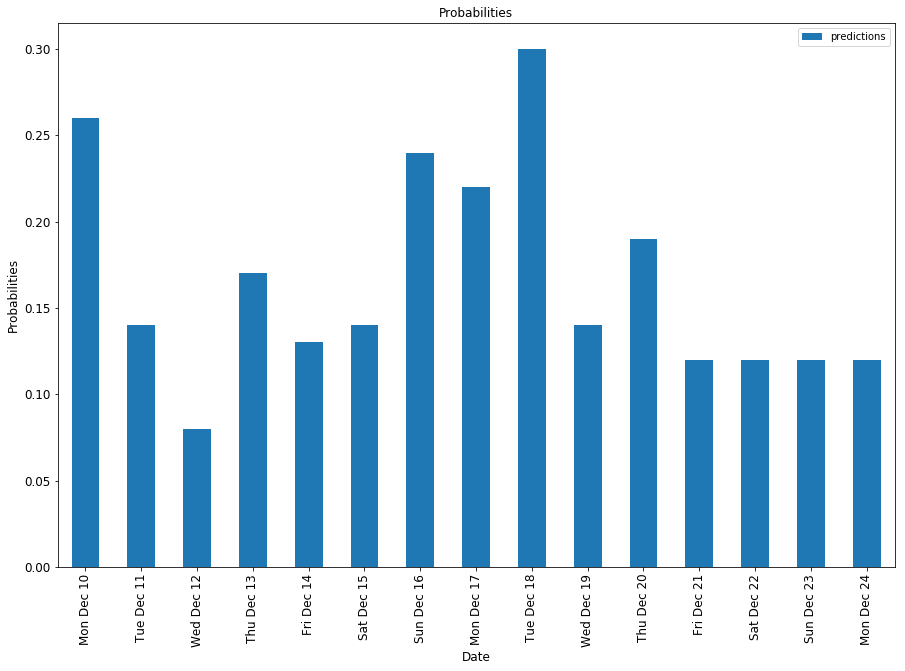

In [150]:
import matplotlib.pyplot as plt
ax = output[['predictions']].plot(kind='bar', title ="Probabilities", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Probabilities", fontsize=12)
ax.set_xticklabels(output['date'], rotation='vertical')
plt.show()

In [123]:
def create_figure():
    '''Create bar chart to display a visual representation of predicted probabilities'''
    fig = Figure()
    axis = fig.subplots()
    xs = output.date
    ys = output.predictions
    axis.set_xlabel("Date", fontsize=12)
    axis.set_ylabel("Probabilities", fontsize=12)
    axis.set_xticklabels(output['date'], rotation='vertical')
    axis.plot(xs, ys)
    return fig

In [124]:
fig = create_figure()

In [132]:
def build_plot():
    '''Create bar chart to display a visual representation of predicted probabilities'''
    ax = output[['predictions']].plot(kind='bar', title ="Probabilities", figsize=(15, 10), legend=True, fontsize=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Probabilities", fontsize=12)
    ax.set_xticklabels(output['date'], rotation='vertical')
    fig = ax.get_figure()
    html_graph = mpld3.fig_to_html(fig)
    return html_graph

In [138]:
fig = plt.figure()
ax = output[['predictions']].plot(kind='bar', title ="Probabilities", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Probabilities", fontsize=12)
ax.set_xticklabels(output['date'], rotation='vertical')
plt.savefig('static/images/graph')